# Variable Creation

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import log10
import statistics
import timeit
import datetime
from sklearn.preprocessing import StandardScaler
import random
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydata = pd.read_excel('card transactions.xlsx', converters={'Merchnum': lambda x: str(x)})

In [3]:
mydata.shape

(96753, 10)

In [4]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [5]:
mydata.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [6]:
mydata.count() * 100 / len(mydata)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [7]:
clean_data = mydata.copy()

In [8]:
clean_data.count() * 100 / len(clean_data)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [9]:
# replace all Merchnum == 0 to NaN
clean_data['Merchnum'] = clean_data['Merchnum'].replace(to_replace = '0', value = np.nan)

In [10]:
clean_data[clean_data['Merchnum'] == '0']

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud


In [11]:
clean_data[pd.isnull(clean_data['Merchnum'])]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.00,0
115,116,5142182128,2010-01-03,NaN,GRAINGER #973,IL,60089.0,P,327.34,0
135,136,5142126842,2010-01-03,NaN,AUTOMATED OFFICE PRODU,MD,20706.0,P,2110.00,0
163,164,5142127276,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
168,169,5142132574,2010-01-03,NaN,ROLL CALL NEWSPAPER,DC,20001.0,P,104.69,0
...,...,...,...,...,...,...,...,...,...,...
96651,96652,5142151962,2010-12-30,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,125.00,0
96689,96690,5142166019,2010-12-30,NaN,ADVANCED SEC & CONTROL,GA,30340.0,P,70.50,0
96707,96708,5142249540,2010-12-31,NaN,SABINE PARISH CLERK 0,116,NaN,A,12.00,0
96720,96721,5142178272,2010-12-31,NaN,TRULOGIC SYSTEMS,ON,NaN,P,343.42,0


## Remove Bad Records and Outliers

In [12]:
# Only use the records from 1/15 through 10/31
#clean_data = clean_data[clean_data['Date'] >= datetime.datetime(2010, 1, 15)]
#clean_data = clean_data[clean_data['Date'] <= datetime.datetime(2010, 10, 31)]

In [13]:
# Remove all but the "P" type transactions
#clean_data = clean_data[clean_data['Transtype'] == 'P']

In [14]:
#clean_data

In [15]:
# Remove Amount ourliers
clean_data['Amount_z'] = StandardScaler().fit_transform(clean_data['Amount'].values.reshape(-1, 1))
clean_data = clean_data[clean_data['Amount_z'] < 3]

In [16]:
# Remove Amount ourliers
#q1 = clean_data.Amount.quantile(0.25)
#q3 = clean_data.Amount.quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 - (1.5 * iqr) 
#upper_bound = q3 + (1.5 * iqr) 

In [17]:
#lower_bound

In [18]:
#upper_bound

In [19]:
#clean_data = clean_data[clean_data['Amount'] < upper_bound]
#clean_data = clean_data[clean_data['Amount'] < upper_bound]

## Check for amount outliers and Transtype

In [20]:
clean_data['Amount'].value_counts()

3.62      4283
3.67      1620
3.74       913
3.80       827
4.37       378
          ... 
890.90       1
64.37        1
220.41       1
417.29       1
179.02       1
Name: Amount, Length: 34907, dtype: int64

In [21]:
clean_data['Transtype'].value_counts()

P    96396
A      181
D      173
Y        1
Name: Transtype, dtype: int64

## Fill in Missing Fields

#### Filling Merch state

In [22]:
clean_data['Merch state'] = clean_data.groupby(['Merch description'])['Merch state'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [23]:
clean_data['Merch state'] = clean_data['Merch state'].fillna(clean_data['Merch state'].mode()[0])

#### Filling Merch zip

In [24]:
clean_data['Merch zip'] = clean_data.groupby(['Merch description'])['Merch zip'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [25]:
clean_data['Merch zip'] = clean_data.groupby(['Merch state'])['Merch zip'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [26]:
clean_data['Merch zip'] = clean_data['Merch zip'].fillna(clean_data['Merch zip'].mode()[0])

#### Filling Merchnum

In [27]:
clean_data['Merchnum'] = clean_data.groupby(['Merch description'])['Merchnum'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [28]:
clean_data['Merchnum'] = clean_data.groupby(['Merch zip'])['Merchnum'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [29]:
clean_data['Merchnum'] = clean_data.groupby(['Merch state'])['Merchnum'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [30]:
mydata.isna().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [31]:
clean_data.isna().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
Amount_z             0
dtype: int64

## Build Candidate Variables

#### Add Day of Week

In [32]:
clean_data['Day_of_Week'] = clean_data['Date'].dt.day_name()

#### Train/Validation Split

In [33]:
clean_data_train = clean_data[clean_data['Date'] < datetime.datetime(2010, 11, 1)]

In [34]:
clean_data_train.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_z,Day_of_Week
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,-0.039622,Friday
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,-0.024924,Friday
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday


#### Two Risk Table Variables

In [35]:
c = 4
nmid = 20
y_avg = clean_data_train['Fraud'].mean()
y_avg

0.010439280164181407

#### Day of Week

In [36]:
y_dow = clean_data_train.groupby('Day_of_Week')['Fraud'].mean()
num_instances_dow = clean_data_train.groupby('Day_of_Week').size()
y_dow_smooth = y_avg + (y_dow - y_avg) / (1 + np.exp(-(num_instances_dow - nmid)/c))
clean_data_train['Day_of_Week_risk'] = clean_data_train['Day_of_Week'].map(y_dow_smooth)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
y_dow

Day_of_Week
Friday       0.025986
Monday       0.008680
Saturday     0.010040
Sunday       0.009588
Thursday     0.018614
Tuesday      0.007095
Wednesday    0.009743
Name: Fraud, dtype: float64

In [38]:
y_dow.to_excel('dow.xlsx')

Text(0.5, 1.0, 'Fraud Proportion of Each Weekday')

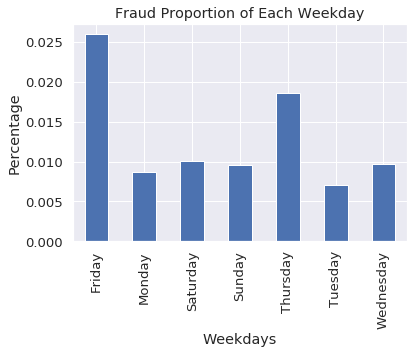

In [39]:
sns.set(font_scale = 1.2)
plot_weekday = y_dow.plot(kind = 'bar')
plt.ylabel('Percentage')
plt.xlabel('Weekdays') 
plt.title('Fraud Proportion of Each Weekday')

#### State

In [40]:
y_state = clean_data_train.groupby('Merch state')['Fraud'].mean()
num_instances_state = clean_data_train.groupby('Merch state').size()
y_state_smooth = y_avg + (y_state - y_avg) / (1 + np.exp(-(num_instances_state - nmid)/c))
clean_data_train['State_risk'] = clean_data_train['Merch state'].map(y_state_smooth)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
y_state

Merch state
005    0.000000
022    0.000000
040    0.000000
042    0.000000
060    0.000000
         ...   
VT     0.000000
WA     0.020518
WI     0.001193
WV     0.000000
WY     0.000000
Name: Fraud, Length: 214, dtype: float64

Text(0.5, 1.0, 'Fraud Proportion of Each State')

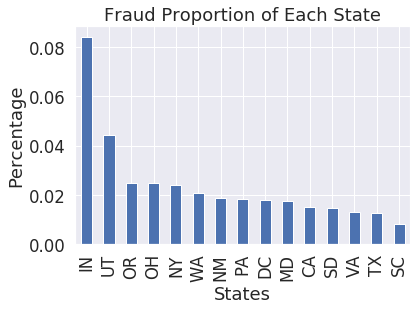

In [42]:
sns.set(font_scale = 1.5)
plot_state = y_state.sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.ylabel('Percentage')
plt.xlabel('States') 
plt.title('Fraud Proportion of Each State')

In [43]:
clean_data_train.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_z,Day_of_Week,Day_of_Week_risk,State_risk
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,0.025986,0.007722
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,-0.039622,Friday,0.025986,0.003304
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,-0.024924,Friday,0.025986,0.017279
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,0.025986,0.007722
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,0.025986,0.007722


#### Create New Entities

In [44]:
clean_data['card_merch'] = clean_data['Cardnum'].astype(str) + clean_data['Merchnum']
clean_data['card_zip'] = clean_data['Cardnum'].astype(str) + clean_data['Merch zip'].astype(int).astype(str)
clean_data['card_state'] = clean_data['Cardnum'].astype(str) + clean_data['Merch state']

In [45]:
entities = ['Cardnum', 'Merchnum', 'card_merch', 'card_zip', 'card_state']

#### Create a copy of Recnum and Date

In [46]:
clean_data['check_record'] = clean_data['Recnum']
clean_data['check_date'] = clean_data['Date']

In [47]:
clean_data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_z,Day_of_Week,card_merch,card_zip,card_state,check_record,check_date
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,51421904395509006296254,514219043938118,5142190439TN,1,2010-01-01
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,-0.039622,Friday,514218397361003026333,51421839731803,5142183973MA,2,2010-01-01
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,-0.024924,Friday,51421317214503082993600,514213172120706,5142131721MD,3,2010-01-01
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,51421484525509006296254,514214845238118,5142148452TN,4,2010-01-01
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,-0.042401,Friday,51421904395509006296254,514219043938118,5142190439TN,5,2010-01-01


#### All New Variables

In [48]:
# a total of 5 entities
# entities = ['Cardnum', 'Merchnum', 'card_merch', 'card_zip', 'card_state']
for entity in entities:
    
    ## Day-since variables (5)
    df_l = clean_data[['Recnum', 'Date', entity]]
    df_r = clean_data[['check_record', 'check_date', entity, 'Amount']]
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum', 'Date', 'check_date']].groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    clean_data[entity + '_day_since'] = clean_data.Recnum.map(mapper)
    clean_data[entity + '_day_since'].fillna((clean_data.Date-pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    
    ## Frequency (5 entities * 6 times = 30) & Amount variables (8 * 5 * 6 = 240)
    for time in [0,1,3,7,14,30]:
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]
        col_name = entity + '_count_' + str(time)  ## 5 entities * 6 times = 30
        mapper2 = temp2.groupby('Recnum')[entity].count()
        clean_data[col_name] = clean_data.Recnum.map(mapper2)
        print(col_name + ' ---> Done')
        clean_data[entity + '_avg_' + str(time)] = clean_data.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        clean_data[entity + '_max_' + str(time)] = clean_data.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        clean_data[entity + '_med_' + str(time)] = clean_data.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        clean_data[entity + '_total_' + str(time)] = clean_data.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        clean_data[entity + '_actual/avg_' + str(time)] = clean_data['Amount'] / clean_data[entity + '_avg_' + str(time)]
        clean_data[entity + '_actual/max_' + str(time)] = clean_data['Amount'] / clean_data[entity + '_max_' + str(time)]
        clean_data[entity + '_actual/med_' + str(time)] = clean_data['Amount'] / clean_data[entity + '_med_' + str(time)]
        clean_data[entity + '_actual/toal_' + str(time)] = clean_data['Amount'] / clean_data[entity + '_total_' + str(time)]

Cardnum_count_0 ---> Done
Cardnum_count_1 ---> Done
Cardnum_count_3 ---> Done
Cardnum_count_7 ---> Done
Cardnum_count_14 ---> Done
Cardnum_count_30 ---> Done
Merchnum_count_0 ---> Done
Merchnum_count_1 ---> Done
Merchnum_count_3 ---> Done
Merchnum_count_7 ---> Done
Merchnum_count_14 ---> Done
Merchnum_count_30 ---> Done
card_merch_count_0 ---> Done
card_merch_count_1 ---> Done
card_merch_count_3 ---> Done
card_merch_count_7 ---> Done
card_merch_count_14 ---> Done
card_merch_count_30 ---> Done
card_zip_count_0 ---> Done
card_zip_count_1 ---> Done
card_zip_count_3 ---> Done
card_zip_count_7 ---> Done
card_zip_count_14 ---> Done
card_zip_count_30 ---> Done
card_state_count_0 ---> Done
card_state_count_1 ---> Done
card_state_count_3 ---> Done
card_state_count_7 ---> Done
card_state_count_14 ---> Done
card_state_count_30 ---> Done


In [49]:
col = clean_data.columns.tolist()
col

['Recnum',
 'Cardnum',
 'Date',
 'Merchnum',
 'Merch description',
 'Merch state',
 'Merch zip',
 'Transtype',
 'Amount',
 'Fraud',
 'Amount_z',
 'Day_of_Week',
 'card_merch',
 'card_zip',
 'card_state',
 'check_record',
 'check_date',
 'Cardnum_day_since',
 'Cardnum_count_0',
 'Cardnum_avg_0',
 'Cardnum_max_0',
 'Cardnum_med_0',
 'Cardnum_total_0',
 'Cardnum_actual/avg_0',
 'Cardnum_actual/max_0',
 'Cardnum_actual/med_0',
 'Cardnum_actual/toal_0',
 'Cardnum_count_1',
 'Cardnum_avg_1',
 'Cardnum_max_1',
 'Cardnum_med_1',
 'Cardnum_total_1',
 'Cardnum_actual/avg_1',
 'Cardnum_actual/max_1',
 'Cardnum_actual/med_1',
 'Cardnum_actual/toal_1',
 'Cardnum_count_3',
 'Cardnum_avg_3',
 'Cardnum_max_3',
 'Cardnum_med_3',
 'Cardnum_total_3',
 'Cardnum_actual/avg_3',
 'Cardnum_actual/max_3',
 'Cardnum_actual/med_3',
 'Cardnum_actual/toal_3',
 'Cardnum_count_7',
 'Cardnum_avg_7',
 'Cardnum_max_7',
 'Cardnum_med_7',
 'Cardnum_total_7',
 'Cardnum_actual/avg_7',
 'Cardnum_actual/max_7',
 'Cardnum_act

#### Velocity Change Variable

In [50]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
clean_data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Amount_z,Day_of_Week,card_merch,card_zip,card_state,check_record,check_date,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/toal_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/toal_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/toal_3,card_merch_count_7,card_merch_avg_7,card_merch_max_7,card_merch_med_7,card_merch_total_7,card_merch_actual/avg_7,card_merch_actual/max_7,card_merch_actual/med_7,card_merch_actual/toal_7,card_merch_count_14,card_merch_avg_14,card_merch_max_14,card_merch_med_14,card_merch_total_14,card_merch_actual/avg_14,card_merch_actual/max_14,card_merch_actual/med_14,card_merch_actual/toal_14,card_merch_count_30,card_merch_avg_30,card_merch_max_30,card_merch_med_30,card_merch_total_30,card_merch_actual/avg_30,card_merch_actual/max_30,card_merch_actual/med_30,card_merch_actual/toal_30,card_zip_day_since,card_zip_count_0,card_zip_avg_0,card_zip_max_0,card_zip_med_0,card_zip_total_0,card_zip_actual/avg_0,card_zip_actual/max_0,card_zip_actual/med_0,card_zip_actual/toal_0,card_zip_count_1,card_zip_avg_1,card_zip_max_1,card_zip_med_1,card_zip_total_1,card_zip_actual/avg_1,card_zip_actual/max_1,card_zip_actual/med_1,card_zip_actual/toal_1,card_zip_count_3,card_zip_avg_3,card_zip_max_3,card_zip_med_3,card_zip_total_3,card_zip_actual/avg_3,card_zip_actual/max_3,card_zip_actual/med_3,card_zip_actual/toal_3,card_zip_count_7,card_zip_avg_7,card_zip_max_7,card_zip_med_7,card_zip_total_7,card_zip_actual/avg_7,card_zip_actual/m

In [51]:
card_and_merch = ['Cardnum', 'Merchnum']
for entity in card_and_merch: 
    for time1 in [0,1]:
        for time2 in [7,14,30]:
            clean_data[entity + '_velo_amount_' + str(time1) + '_' + str(time2)] = clean_data[entity + '_total_' + str(time1)]/clean_data[entity + '_avg_' + str(time2)]
            clean_data[entity + '_velo_count_' + str(time1) + '_' + str(time2)] = clean_data[entity + '_count_' + str(time1)]/(clean_data[entity + '_count_' + str(time2)]/time2)

## Calculate Min, Max, Mean, Stdev for all candidate variables

In [52]:
table = pd.DataFrame(clean_data.describe())

In [53]:
table

,Recnum,Cardnum,Merch zip,Amount,Fraud,Amount_z,check_record,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/toal_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/toal_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/toal_3,card_merch_count_7,card_merch_avg_7,card_merch_max_7,card_merch_med_7,card_merch_total_7,card_merch_actual/avg_7,card_merch_actual/max_7,card_merch_actual/med_7,card_merch_actual/toal_7,card_merch_count_14,card_merch_avg_14,card_merch_max_14,card_merch_med_14,card_merch_total_14,card_merch_actual/avg_14,card_merch_actual/max_14,card_merch_actual/med_14,card_merch_actual/toal_14,card_merch_count_30,card_merch_avg_30,card_merch_max_30,card_merch_med_30,card_merch_total_30,card_merch_actual/avg_30,card_merch_actual/max_30,card_merch_actual/med_30,card_merch_actual/toal_30,card_zip_day_since,card_zip_count_0,card_zip_avg_0,card_zip_max_0,card_zip_med_0,card_zip_total_0,card_zip_actual/avg_0,card_zip_actual/max_0,card_zip_actual/med_0,card_zip_actual/toal_0,card_zip_count_1,card_zip_avg_1,card_zip_max_1,card_zip_med_1,card_zip_total_1,card_zip_actual/avg_1,card_zip_actual/max_1,card_zip_actual/med_1,card_zip_actual/toal_1,card_zip_count_3,card_zip_avg_3,card_zip_max_3,card_zip_med_3,card_zip_total_3,card_zip_actual/avg_3,card_zip_actual/max_3,card_zip_actual/med_3,card_zip_actual/toal_3,card_zip_count_7,card_zip_avg_7,card_zip_max_7,card_zip_med_7,card_zip_total_7,card_zip_actual/avg_7,card_zip_actual/max_7,card_zip_actual/med_7,card_zip_actual/toal_7,card_zip_count_14,card_zip_avg_14,card_zip_max_14,card_zip

In [54]:
#pip install openpyxl

In [55]:
#table.T.to_excel('HW5output.xlsx')

# Variable Creation Part 2

## Keep 299 variables with Fraud and Random number

In [56]:
# Keep the 299 variables
Date = clean_data.Date.tolist()
Fraud = clean_data.Fraud.tolist()
Transtype = clean_data.Transtype.tolist()

dat = clean_data
dat = dat.drop(['Fraud', 'Date', 'Recnum', 'Cardnum', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Amount_z', 'Day_of_Week', 'card_merch', 'card_zip', 'card_state', 'check_record', 'check_date'], axis=1)

In [57]:
dat.shape

(96751, 299)

In [58]:
# z-scale all variables
dat_scaled = StandardScaler().fit_transform(dat)
dat = pd.DataFrame(dat_scaled, columns = dat.columns)
dat

,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/toal_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/toal_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/toal_3,card_merch_count_7,card_merch_avg_7,card_merch_max_7,card_merch_med_7,card_merch_total_7,card_merch_actual/avg_7,card_merch_actual/max_7,card_merch_actual/med_7,card_merch_actual/toal_7,card_merch_count_14,card_merch_avg_14,card_merch_max_14,card_merch_med_14,card_merch_total_14,card_merch_actual/avg_14,card_merch_actual/max_14,card_merch_actual/med_14,card_merch_actual/toal_14,card_merch_count_30,card_merch_avg_30,card_merch_max_30,card_merch_med_30,card_merch_total_30,card_merch_actual/avg_30,card_merch_actual/max_30,card_merch_actual/med_30,card_merch_actual/toal_30,card_zip_day_since,card_zip_count_0,card_zip_avg_0,card_zip_max_0,card_zip_med_0,card_zip_total_0,card_zip_actual/avg_0,card_zip_actual/max_0,card_zip_actual/med_0,card_zip_actual/toal_0,card_zip_count_1,card_zip_avg_1,card_zip_max_1,card_zip_med_1,card_zip_total_1,card_zip_actual/avg_1,card_zip_actual/max_1,card_zip_actual/med_1,card_zip_actual/toal_1,card_zip_count_3,card_zip_avg_3,card_zip_max_3,card_zip_med_3,card_zip_total_3,card_zip_actual/avg_3,card_zip_actual/max_3,card_zip_actual/med_3,card_zip_actual/toal_3,card_zip_count_7,card_zip_avg_7,card_zip_max_7,card_zip_med_7,card_zip_total_7,card_zip_actual/avg_7,card_zip_actual/max_7,card_zip_actual/med_7,card_zip_actual/toal_7,card_zip_count_14,card_zip_avg_14,card_zip_max_14,card_zip_med_14,card_zip_total_14,card_zip_actual/avg_14,card_zip_ac

In [59]:
## Add in Date and the fraud label
dat['Date'] = Date
dat['Fraud'] = Fraud
dat['Transtype'] = Transtype
dat.shape

(96751, 302)

## Remove bad records

In [60]:
# Only use the records from 1/15 through 10/31
dat = dat[dat['Date'] >= datetime.datetime(2010, 1, 15)]
dat = dat[dat['Date'] <= datetime.datetime(2010, 10, 31)]

# Remove all but the "P" type transactions
dat = dat[dat['Transtype'] == 'P']

In [61]:
dat = dat.drop(['Date', 'Transtype'], axis=1)

In [62]:
dat

,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/toal_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/toal_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/toal_3,card_merch_count_7,card_merch_avg_7,card_merch_max_7,card_merch_med_7,card_merch_total_7,card_merch_actual/avg_7,card_merch_actual/max_7,card_merch_actual/med_7,card_merch_actual/toal_7,card_merch_count_14,card_merch_avg_14,card_merch_max_14,card_merch_med_14,card_merch_total_14,card_merch_actual/avg_14,card_merch_actual/max_14,card_merch_actual/med_14,card_merch_actual/toal_14,card_merch_count_30,card_merch_avg_30,card_merch_max_30,card_merch_med_30,card_merch_total_30,card_merch_actual/avg_30,card_merch_actual/max_30,card_merch_actual/med_30,card_merch_actual/toal_30,card_zip_day_since,card_zip_count_0,card_zip_avg_0,card_zip_max_0,card_zip_med_0,card_zip_total_0,card_zip_actual/avg_0,card_zip_actual/max_0,card_zip_actual/med_0,card_zip_actual/toal_0,card_zip_count_1,card_zip_avg_1,card_zip_max_1,card_zip_med_1,card_zip_total_1,card_zip_actual/avg_1,card_zip_actual/max_1,card_zip_actual/med_1,card_zip_actual/toal_1,card_zip_count_3,card_zip_avg_3,card_zip_max_3,card_zip_med_3,card_zip_total_3,card_zip_actual/avg_3,card_zip_actual/max_3,card_zip_actual/med_3,card_zip_actual/toal_3,card_zip_count_7,card_zip_avg_7,card_zip_max_7,card_zip_med_7,card_zip_total_7,card_zip_actual/avg_7,card_zip_actual/max_7,card_zip_actual/med_7,card_zip_actual/toal_7,card_zip_count_14,card_zip_avg_14,card_zip_max_14,card_zip_med_14,card_zip_total_14,card_zip_actual/avg_14,card_zip_ac

In [63]:
## Add random number
num = list(range(1, 80632))
random.shuffle(num)

In [64]:
dat['Random_num'] = num

In [65]:
dat

,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,card_merch_day_since,card_merch_count_0,card_merch_avg_0,card_merch_max_0,card_merch_med_0,card_merch_total_0,card_merch_actual/avg_0,card_merch_actual/max_0,card_merch_actual/med_0,card_merch_actual/toal_0,card_merch_count_1,card_merch_avg_1,card_merch_max_1,card_merch_med_1,card_merch_total_1,card_merch_actual/avg_1,card_merch_actual/max_1,card_merch_actual/med_1,card_merch_actual/toal_1,card_merch_count_3,card_merch_avg_3,card_merch_max_3,card_merch_med_3,card_merch_total_3,card_merch_actual/avg_3,card_merch_actual/max_3,card_merch_actual/med_3,card_merch_actual/toal_3,card_merch_count_7,card_merch_avg_7,card_merch_max_7,card_merch_med_7,card_merch_total_7,card_merch_actual/avg_7,card_merch_actual/max_7,card_merch_actual/med_7,card_merch_actual/toal_7,card_merch_count_14,card_merch_avg_14,card_merch_max_14,card_merch_med_14,card_merch_total_14,card_merch_actual/avg_14,card_merch_actual/max_14,card_merch_actual/med_14,card_merch_actual/toal_14,card_merch_count_30,card_merch_avg_30,card_merch_max_30,card_merch_med_30,card_merch_total_30,card_merch_actual/avg_30,card_merch_actual/max_30,card_merch_actual/med_30,card_merch_actual/toal_30,card_zip_day_since,card_zip_count_0,card_zip_avg_0,card_zip_max_0,card_zip_med_0,card_zip_total_0,card_zip_actual/avg_0,card_zip_actual/max_0,card_zip_actual/med_0,card_zip_actual/toal_0,card_zip_count_1,card_zip_avg_1,card_zip_max_1,card_zip_med_1,card_zip_total_1,card_zip_actual/avg_1,card_zip_actual/max_1,card_zip_actual/med_1,card_zip_actual/toal_1,card_zip_count_3,card_zip_avg_3,card_zip_max_3,card_zip_med_3,card_zip_total_3,card_zip_actual/avg_3,card_zip_actual/max_3,card_zip_actual/med_3,card_zip_actual/toal_3,card_zip_count_7,card_zip_avg_7,card_zip_max_7,card_zip_med_7,card_zip_total_7,card_zip_actual/avg_7,card_zip_actual/max_7,card_zip_actual/med_7,card_zip_actual/toal_7,card_zip_count_14,card_zip_avg_14,card_zip_max_14,card_zip_med_14,card_zip_total_14,card_zip_actual/avg_14,card_zip_ac

## Filter

In [67]:
KSFDR = pd.DataFrame(index = list(range(0, 301)), columns = ['ks', 'FDR', 'rank_ks', 'rank_FDR', 'average_rank'])

In [68]:
goods = dat[dat['Fraud'] == 0]
bads = dat[dat['Fraud'] == 1]

In [69]:
numbads = sum(bads['Fraud'])
numbads

868

In [70]:
## ks score
i = 0
for column in dat:
    KSFDR['ks'][i] = sps.ks_2samp(goods[column], bads[column])[0]
    i = i + 1

In [72]:
## FDR
topRows = int(round(len(dat)*0.03))
j = 0
for column in dat:
    temp = dat.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR.loc[j, 'FDR'] = FDRate
    j = j + 1

In [73]:
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False, inplace=True)       

In [126]:
#KSFDR.to_csv('hw6_output.csv')

In [92]:
## Keep top 80 variables
index_80 = list(KSFDR.head(80).index)
var_80 = dat.iloc[:, index_80]

In [93]:
var_80

,Fraud,card_zip_total_7,card_zip_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_3,card_state_total_3,card_zip_total_14,card_state_total_7,card_zip_total_1,card_state_total_1,card_merch_total_1,card_merch_total_30,card_state_total_14,card_zip_total_30,card_zip_max_14,card_state_total_0,card_merch_total_0,card_zip_total_0,card_state_max_7,card_zip_max_30,card_merch_max_14,card_zip_max_3,card_state_max_14,Cardnum_total_3,card_zip_max_7,card_merch_max_30,card_merch_max_3,card_merch_max_7,card_state_max_3,Cardnum_total_7,card_state_total_30,card_merch_max_1,card_state_max_30,card_zip_max_1,card_state_max_1,Cardnum_total_1,Cardnum_total_0,card_state_max_0,card_zip_max_0,card_merch_max_0,Merchnum_total_0,Merchnum_max_0,Cardnum_max_0,Merchnum_total_1,Cardnum_max_7,Cardnum_max_1,Cardnum_max_3,Cardnum_avg_1,card_state_avg_7,Cardnum_total_14,card_state_avg_3,Cardnum_avg_3,Cardnum_max_14,Merchnum_avg_0,card_state_avg_1,card_merch_avg_0,card_state_avg_0,card_zip_avg_0,Cardnum_avg_0,card_zip_avg_30,card_zip_avg_3,card_state_avg_14,Merchnum_max_1,card_merch_avg_3,card_zip_avg_1,card_zip_avg_7,card_state_avg_30,card_merch_avg_30,card_merch_avg_1,card_zip_avg_14,Merchnum_total_3,card_merch_avg_14,card_merch_avg_7,Merchnum_avg_1,Cardnum_avg_7,Cardnum_med_1,Merchnum_max_3,Cardnum_avg_14,card_state_med_0
3344,0,0.304594,-0.075832,0.310367,0.286192,-0.073132,-0.098082,0.276439,0.249872,-0.067553,-0.080052,-0.065973,0.241445,0.180011,0.223876,0.469440,-0.083276,-0.074263,-0.075436,0.398963,0.417492,0.488055,-0.111866,0.320301,0.074116,0.507657,0.446311,-0.107284,0.519470,-0.145571,0.168967,0.056301,-0.098775,0.210693,-0.101435,-0.121319,0.078122,-0.118972,-0.105420,-0.096047,-0.094569,-0.178101,-0.204795,-0.161122,-0.216881,0.014630,0.265990,0.140171,0.181825,0.338628,0.491951,-0.083302,-0.184234,0.221977,-0.081267,-0.080862,-0.078244,-0.078566,-0.078259,-0.082742,0.323331,-0.081497,0.345665,-0.280341,-0.081159,-0.079999,0.324159,0.365689,0.320851,-0.079757,0.322292,-0.157326,0.321067,0.322294,-0.086089,0.004206,-0.046468,-0.358386,0.006427,-0.074891
3345,0,-0.090028,-0.114058,-0.089221,-0.065165,-0.114606,-0.135819,-0.065966,-0.132373,-0.149579,-0.161466,-0.148053,-0.099093,-0.138018,-0.105966,-0.458337,-0.208397,-0.200278,-0.201369,-0.472690,-0.482863,-0.450347,-0.430413,-0.500231,-0.110993,-0.444319,-0.471555,-0.432681,-0.438521,-0.452630,-0.194003,-0.219997,-0.428595,-0.538542,-0.430682,-0.444681,-0.079217,-0.215148,-0.458891,-0.452478,-0.451299,-0.292974,-0.530004,-0.484153,-0.291174,-0.190444,0.038217,-0.061355,-0.096519,-0.526008,-0.274474,-0.511523,-0.594870,-0.291940,-0.515900,-0.502924,-0.493592,-0.499151,-0.494753,-0.539517,-0.517536,-0.497089,-0.543878,-0.561944,-0.495312,-0.495215,-0.504092,-0.579708,-0.512084,-0.493756,-0.508822,-0.226261,-0.505742,-0.500926,-0.528099,-0.692015,-0.051115,-0.598891,-0.749574,-0.498905
3346,0,-0.031114,-0.014332,-0.026075,0.369570,-0.011569,0.053177,0.359442,0.012534,-0.005374,-0.018338,-0.003754,0.322255,0.339835,0.303834,0.058108,-0.106673,-0.097827,-0.098985,-0.151615,0.018317,0.072013,-0.166278,-0.043483,1.138290,-0.185418,0.039373,-0.161894,-0.177983,-0.108596,1.020154,0.195155,-0.153635,-0.121482,-0.156199,-0.175105,0.317283,-0.136956,-0.171517,-0.162697,-0.161275,-0.199581,-0.265607,-0.221528,-0.160565,0.947567,0.640225,1.274373,0.029447,-0.214150,1.173102,-0.206940,0.334602,0.703935,-0.162541,-0.259327,-0.155912,-0.157213,-0.156141,-0.168156,-0.191210,-0.257781,-0.182798,-0.327181,-0.256706,-0.255569,-0.262101,-0.195955,-0.188717,-0.254813,-0.186281,-0.255457,-0.184754,-0.260311,-0.272989,0.311482,-0.140695,-0.401344,0.101019,-0.154180
3347,0,-0.089146,-0.113166,-0.088337,-0.064295,-0.113712,-0.134938,-0.065100,-0.131518,-0.148677,-0.160570,-0.147150,-0.098249,-0.137213,-0.105131,-0.458337,-0.207020,-0.198891,-0.199984,-0.472690,-0.482863,-0.450347,-0.430413,-0.500231,-0.110400,-0.444319,-0.471555,-0.432681,-0.438521,-0.452630,-0.193497,-0.219298,-0.428595,-0.538542,-0.430682,-0

## Wrapper

In [102]:
var_79 = var_80.loc[:, var_80.columns != 'Fraud']

In [104]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=2, verbose=2, n_jobs=-1, scoring='roc_auc')
rfecv.fit(var_79, var_80['Fraud'])

Fitting estimator with 79 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 78 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 77 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 76 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 75 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 74 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 73 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 72 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 71 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 70 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 69 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 68 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 67 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 66 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 65 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 64 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 63 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 62 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 61 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 60 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 59 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 58 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 57 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 56 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 55 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 54 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 53 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 52 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 51 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 50 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 49 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 48 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 47 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 46 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 45 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 44 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 43 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 42 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 41 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 40 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 39 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 38 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 37 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 36 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 35 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 34 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 33 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 32 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 31 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 30 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 29 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 28 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 27 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 26 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 25 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 24 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 23 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 22 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 21 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 20 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 19 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 18 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 17 features.
Fitting estimator with 16 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 15 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 14 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


RFECV(cv=2, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc',
      verbose=2)

In [105]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), var_80.columns)),
                            columns = ['ranking', 'variable'])
print(var_selected)

    ranking             variable
0         1        Cardnum_max_0
1         1        Cardnum_med_1
2         1    card_merch_avg_14
3         1     card_merch_max_3
4         1    card_state_avg_30
5         1   card_state_total_3
6         1       card_zip_avg_1
7         1       card_zip_max_7
8         2     card_merch_avg_1
9         3   card_merch_total_7
10        4      card_zip_max_30
11        5   card_merch_total_1
12        6    card_merch_max_14
13        7    card_state_max_30
14        8     card_state_max_1
15        9       card_zip_avg_0
16       10       Merchnum_max_0
17       11  card_merch_total_30
18       12     card_zip_total_3
19       13    card_merch_max_30
20       14     card_state_avg_7
21       15        Cardnum_avg_3
22       16       Cardnum_max_14
23       17     card_merch_avg_7
24       18   card_merch_total_3
25       19  card_merch_total_14
26       20      Cardnum_total_1
27       21        Cardnum_avg_0
28       22        Cardnum_max_3
29       2

In [116]:
# Keep top 50 variables
top_50 = list(var_selected.head(50)['variable'])

In [118]:
var_50 = dat[top_50]

In [119]:
var_50

,Cardnum_max_0,Cardnum_med_1,card_merch_avg_14,card_merch_max_3,card_state_avg_30,card_state_total_3,card_zip_avg_1,card_zip_max_7,card_merch_avg_1,card_merch_total_7,card_zip_max_30,card_merch_total_1,card_merch_max_14,card_state_max_30,card_state_max_1,card_zip_avg_0,Merchnum_max_0,card_merch_total_30,card_zip_total_3,card_merch_max_30,card_state_avg_7,Cardnum_avg_3,Cardnum_max_14,card_merch_avg_7,card_merch_total_3,card_merch_total_14,Cardnum_total_1,Cardnum_avg_0,Cardnum_max_3,Cardnum_avg_7,card_zip_max_1,card_merch_avg_0,card_zip_max_14,card_zip_avg_14,card_state_total_7,Merchnum_max_1,card_state_total_0,card_state_max_0,card_zip_total_7,Cardnum_max_7,card_state_max_3,Cardnum_avg_14,Merchnum_total_1,Cardnum_avg_1,Merchnum_avg_0,Merchnum_total_3,card_zip_total_0,card_state_total_14,card_merch_max_1,card_zip_max_3
3344,-0.161122,-0.046468,0.321067,-0.107284,0.365689,-0.098082,-0.079999,0.507657,-0.079757,0.310367,0.417492,-0.065973,0.488055,0.210693,-0.121319,-0.078259,-0.204795,0.241445,-0.075832,0.446311,0.338628,-0.184234,0.221977,0.322294,-0.073132,0.286192,0.078122,-0.082742,0.140171,0.004206,-0.101435,-0.078244,0.469440,0.322292,0.249872,-0.280341,-0.083276,-0.105420,0.304594,0.014630,-0.145571,0.006427,-0.216881,0.181825,-0.081267,-0.157326,-0.075436,0.180011,-0.098775,-0.111866
3345,-0.484153,-0.051115,-0.505742,-0.432681,-0.579708,-0.135819,-0.495215,-0.444319,-0.493756,-0.089221,-0.482863,-0.148053,-0.450347,-0.538542,-0.444681,-0.494753,-0.530004,-0.099093,-0.114058,-0.471555,-0.526008,-0.594870,-0.291940,-0.500926,-0.114606,-0.065165,-0.079217,-0.539517,-0.061355,-0.692015,-0.430682,-0.493592,-0.458337,-0.508822,-0.132373,-0.561944,-0.208397,-0.458891,-0.090028,-0.190444,-0.452630,-0.749574,-0.291174,-0.096519,-0.515900,-0.226261,-0.201369,-0.138018,-0.428595,-0.430413
3346,-0.221528,-0.140695,-0.184754,-0.161894,-0.195955,0.053177,-0.255569,-0.185418,-0.254813,-0.026075,0.018317,-0.003754,0.072013,-0.121482,-0.175105,-0.156141,-0.265607,0.322255,-0.014332,0.039373,-0.214150,0.334602,0.703935,-0.260311,-0.011569,0.369570,0.317283,-0.168156,1.274373,0.311482,-0.156199,-0.155912,0.058108,-0.186281,0.012534,-0.327181,-0.106673,-0.171517,-0.031114,0.947567,-0.108596,0.101019,-0.160565,0.029447,-0.162541,-0.255457,-0.098985,0.339835,-0.153635,-0.166278
3347,-0.484153,-0.550371,-0.505750,-0.432681,-0.579718,-0.134938,-0.495688,-0.444319,-0.494228,-0.088337,-0.482863,-0.147150,-0.450347,-0.538542,-0.444681,-0.495228,-0.530004,-0.098249,-0.113166,-0.471555,-0.526030,-0.595829,-0.291940,-0.500945,-0.113712,-0.064295,-0.078577,-0.540037,-0.061355,-0.692269,-0.430682,-0.494065,-0.458337,-0.508832,-0.131518,-0.561944,-0.207020,-0.458891,-0.089146,-0.190444,-0.452630,-0.749677,-0.290356,-0.259042,-0.516395,-0.225592,-0.199984,-0.137213,-0.428595,-0.430413
3348,-0.472463,-0.532135,-0.490534,-0.423723,-0.562534,-0.175276,-0.480188,-0.443454,-0.478774,-0.164494,-0.482045,-0.145083,-0.449494,-0.537861,-0.432978,-0.479681,-0.518235,-0.211655,-0.154027,-0.470721,-0.510712,-0.608139,-0.643126,-0.486233,-0.151408,-0.181304,-0.193152,-0.522986,-0.532387,-0.687636,-0.418766,-0.478560,-0.457494,-0.493724,-0.209091,-0.551753,-0.203869,-0.446099,-0.169231,-0.591753,-0.449487,-0.737339,-0.288485,-0.565202,-0.500171,-0.339179,-0.196812,-0.252253,-0.416659,-0.427152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84292,-0.194201,-0.098068,-0.129421,-0.140904,-0.149531,-0.106284,-0.122518,-0.164732,-0.122151,-0.095245,-0.218437,-0.074378,-0.174746,-0.318498,-0.154431,-0.120908,-0.120157,-0.145580,-0.084140,-0.201986,-0.132808,-0.153620,-0.487621,-0.126488,-0.081449,-0.113130,-0.143043,-0.129516,-0.323813,-0.175251,-0.135150,-0.120776,-0.185857,-0.130647,-0.142161,-0.207053,-0.096089,-0.141615,-0.100134,-0.414053,-0.177861,-0.187590,-0.129875,-0.142267,-0.046962,-0.195663,-0.088331,-0.1892

In [120]:
# fit the 50 variables
rfecv.fit(var_50, dat['Fraud'])

Fitting estimator with 50 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 49 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 48 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 47 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 46 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 45 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 44 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 43 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 42 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 41 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 40 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 39 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 38 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 37 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 36 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 35 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 34 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 33 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 32 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 31 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 30 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 29 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 28 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 27 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 26 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 25 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 24 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 23 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 22 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 21 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 20 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 19 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 18 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 17 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 16 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 15 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 14 features.


/home/jovyan/.rsm-msba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFECV(cv=2, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc',
      verbose=2)

In [121]:
var_selected2 = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), var_50.columns)),
                            columns = ['ranking', 'variable'])
print(var_selected2)

    ranking             variable
0         1       Merchnum_max_1
1         1     Merchnum_total_1
2         1     card_merch_avg_0
3         1    card_merch_max_14
4         1    card_merch_max_30
5         1   card_merch_total_3
6         1  card_merch_total_30
7         1   card_merch_total_7
8         1   card_state_total_7
9         1       card_zip_max_1
10        1      card_zip_max_14
11        1       card_zip_max_7
12        1     card_zip_total_3
13        2     card_merch_avg_7
14        3      Cardnum_total_1
15        4     card_merch_max_3
16        5   card_state_total_3
17        6     card_zip_total_7
18        7        Cardnum_avg_0
19        8        Cardnum_max_0
20        9     Merchnum_total_3
21       10     card_state_max_1
22       11      card_zip_avg_14
23       12    card_merch_avg_14
24       13   card_merch_total_1
25       14       card_zip_avg_0
26       15     card_merch_max_1
27       16       card_zip_max_3
28       17   card_state_total_0
29       1

In [123]:
# Keep top 30 variables
top_30 = list(var_selected.head(30)['variable'])

In [142]:
pd.DataFrame(top_30).to_csv('top_30.csv')

In [137]:
KSFDR = KSFDR.sort_index(axis = 0)

In [132]:
var = list(dat.columns)

In [133]:
var

['Cardnum_day_since',
 'Cardnum_count_0',
 'Cardnum_avg_0',
 'Cardnum_max_0',
 'Cardnum_med_0',
 'Cardnum_total_0',
 'Cardnum_actual/avg_0',
 'Cardnum_actual/max_0',
 'Cardnum_actual/med_0',
 'Cardnum_actual/toal_0',
 'Cardnum_count_1',
 'Cardnum_avg_1',
 'Cardnum_max_1',
 'Cardnum_med_1',
 'Cardnum_total_1',
 'Cardnum_actual/avg_1',
 'Cardnum_actual/max_1',
 'Cardnum_actual/med_1',
 'Cardnum_actual/toal_1',
 'Cardnum_count_3',
 'Cardnum_avg_3',
 'Cardnum_max_3',
 'Cardnum_med_3',
 'Cardnum_total_3',
 'Cardnum_actual/avg_3',
 'Cardnum_actual/max_3',
 'Cardnum_actual/med_3',
 'Cardnum_actual/toal_3',
 'Cardnum_count_7',
 'Cardnum_avg_7',
 'Cardnum_max_7',
 'Cardnum_med_7',
 'Cardnum_total_7',
 'Cardnum_actual/avg_7',
 'Cardnum_actual/max_7',
 'Cardnum_actual/med_7',
 'Cardnum_actual/toal_7',
 'Cardnum_count_14',
 'Cardnum_avg_14',
 'Cardnum_max_14',
 'Cardnum_med_14',
 'Cardnum_total_14',
 'Cardnum_actual/avg_14',
 'Cardnum_actual/max_14',
 'Cardnum_actual/med_14',
 'Cardnum_actual/toal

In [138]:
KSFDR['Variable'] = var

In [139]:
KSFDR

,ks,FDR,rank_ks,rank_FDR,average_rank,Variable
0,0.290905,0.0864055,121.0,130.5,125.75,Cardnum_day_since
1,0.339269,0.170507,158.0,168.0,163.00,Cardnum_count_0
2,0.570031,0.328341,235.0,236.0,235.50,Cardnum_avg_0
3,0.585114,0.425115,251.0,256.0,253.50,Cardnum_max_0
4,0.557808,0.308756,216.0,226.0,221.00,Cardnum_med_0
5,0.570764,0.551843,238.0,284.0,261.00,Cardnum_total_0
6,0.170976,0.0518433,32.0,73.0,52.50,Cardnum_actual/avg_0
7,0.279293,0.0264977,113.0,41.5,77.25,Cardnum_actual/max_0
8,0.163205,0.0633641,25.0,87.5,56.25,Cardnum_actual/med_0
9,0.316274,0.0460829,139.0,64.5,101.75,Cardnum_actual/toal_0


In [140]:
KSFDR.to_csv('hw6_output.csv')